In [15]:
def sci_notation_latex(value):
    exponent = int(np.log10(value))
    mantissa = value / 10**exponent
    return f'{mantissa:.1f} \\times 10^{{{exponent}}}'

In [16]:
def read_dataAtlas_complete(file_path):
    x_values = []
    y_values = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.split()
            if len(parts) == 4:
                x = np.abs(float(parts[0]))
                y = float(parts[3])
                x_values.append(x)
                y_values.append(y)

    return x_values, y_values

In [17]:
def read_dataSimp_complete(file_path):
    x_values = []
    y_values = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.split()
            if len(parts) == 4:
                x = np.abs(float(parts[1]))
                y = float(parts[3])
                x_values.append(x)
                y_values.append(y)

    return x_values, y_values

In [22]:
def graficador(alpha56, z_atlasc1, z_simp1, count_condition1, count_condition2, count_condition3):

    alpha56cristian = alpha56
    if(alpha56 == 4):
        alpha56 = 3.9e5
    elif(alpha56 == 5):
        alpha56 = 5.4e5
    elif(alpha56 == 6):
        alpha56 = 9.2e5

    z_atlasc = [x for x in z_atlasc1 if x > 1.0e-11]

    z_simp = [y for x, y in zip(z_atlasc1, z_simp1) if x > 1.0e-11]

    
    #print(shortened_porcentaje_salta)

    # Scatter plot for each data set
    plt.scatter(z_atlasc, z_simp, alpha=0.5, color='red', marker='x')
   
    M_4 = 10e6
    M_5 = 5.5e1
    M_6 = 7e1
    # Add the text to the plot
    # Adjust the y-axis limits to allow for more space below
    #plt.ylim(-1000, 6)
    plt.text(10e-11, 1, f'$\\alpha_{{nb}}^{{56}} = {sci_notation_latex(alpha56)}$', fontsize=12, color='black')
    plt.text(10e-12, 10e-3, f'$\\bullet Z_{{Simple}} > 300$ & $Z_{{ATLAS}} > 300 = ${count_condition1}', fontsize=10, color='black')
    plt.text(10e-12, 10e-4, f'$\\bullet Z_{{Simple}} > 300$ & $Z_{{ATLAS}} < 300 = ${count_condition2}', fontsize=10, color='black')
    plt.text(10e-12, 10e-5, f'$\\bullet Z_{{Simple}} < 300$ & $Z_{{ATLAS}} > 300 = ${count_condition3}', fontsize=10, color='black')

    # Add horizontal and vertical lines
    plt.axhline(y=300, color='black', linestyle='-')
    plt.axvline(x=300, color='black', linestyle='-')

    # Set log scale for both axes
    plt.xscale('log')
    plt.yscale('log')

    # Set labels and title
    plt.xlabel('delta z atlas')
    plt.ylabel(f'Deltaz simple')
    plt.title(f'Deltaz atlas vs deltaz simple {alpha56cristian}')

    # Show legend
    plt.legend(fontsize=12)

    # Show grid
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Save the plot to a file with higher quality
    plt.savefig(f'scatter_plot_zsimp_zatlas_condiciones{alpha56cristian}.png', format='png', dpi=300, bbox_inches='tight')

    # Display the plot
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The number of elements in the array is: 6106


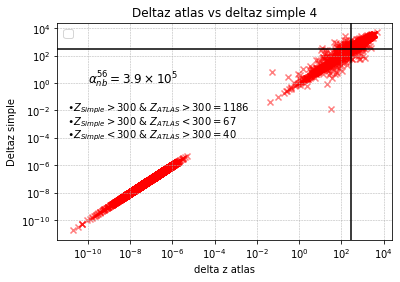

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of points with z_simp1 and z_atlasc1 > 300 for alpha 4: 1186
Number of points with z_simp1 > 300 and z_atlasc1 < 300 for alpha 4: 67
Number of points with z_simp1 < 300 and z_atlasc1 > 300 for alpha 4: 40
The number of elements in the array is: 6790


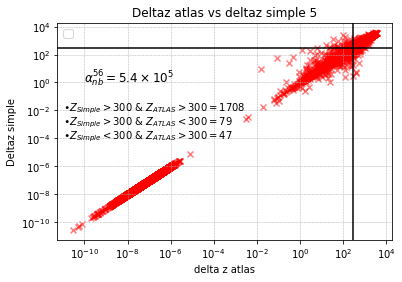

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of points with z_simp1 and z_atlasc1 > 300 for alpha 5: 1708
Number of points with z_simp1 > 300 and z_atlasc1 < 300 for alpha 5: 79
Number of points with z_simp1 < 300 and z_atlasc1 > 300 for alpha 5: 47
The number of elements in the array is: 7294


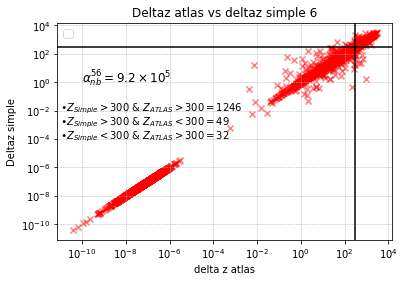

Number of points with z_simp1 and z_atlasc1 > 300 for alpha 6: 1246
Number of points with z_simp1 > 300 and z_atlasc1 < 300 for alpha 6: 49
Number of points with z_simp1 < 300 and z_atlasc1 > 300 for alpha 6: 32


In [23]:
import matplotlib.pyplot as plt
import os
import numpy as np

for number_alpha56 in [4, 5, 6]:
    # Read the data from both files
    file_path_pt = f'eta_histoconstant{number_alpha56}.txt'

    #obtenemos los valores menores de 300
    z_simp, y_simp = read_dataSimp_complete(file_path_pt)

    z_atlasc, y_atlasc = read_dataAtlas_complete(file_path_pt)

    

    z_atlasc1 = np.array([z_atlasc])  # Replace with actual data
    z_simp1 = np.array([z_simp])  # Replace with actual data

    num_elements = z_atlasc1.size

    print(f'The number of elements in the array is: {num_elements}')

    # Condition 1: z_simp1 and z_atlasc1 > 300
    condition1 = (z_simp1 > 300) & (z_atlasc1 > 300)
    count_condition1 = np.sum(condition1)

    # Condition 2: z_simp1 > 300 and z_atlasc1 < 300
    condition2 = (z_simp1 > 300) & (z_atlasc1 < 300)
    count_condition2 = np.sum(condition2)

    # Condition 3: z_simp1 < 300 and z_atlasc1 > 300
    condition3 = (z_simp1 < 300) & (z_atlasc1 > 300)
    count_condition3 = np.sum(condition3)

    graficador(
    number_alpha56,
    z_atlasc,
    z_simp,
    count_condition1,
    count_condition2,
    count_condition3
    )
    # Display results
    print(f'Number of points with z_simp1 and z_atlasc1 > 300 for alpha {number_alpha56}: {count_condition1}')
    print(f'Number of points with z_simp1 > 300 and z_atlasc1 < 300 for alpha {number_alpha56}: {count_condition2}')
    print(f'Number of points with z_simp1 < 300 and z_atlasc1 > 300 for alpha {number_alpha56}: {count_condition3}')